<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Checking-overlap-with-train" data-toc-modified-id="Checking-overlap-with-train-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checking overlap with train</a></span></li><li><span><a href="#DM-run" data-toc-modified-id="DM-run-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>DM run</a></span></li><li><span><a href="#Communites" data-toc-modified-id="Communites-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Communites</a></span><ul class="toc-item"><li><span><a href="#n100_r5" data-toc-modified-id="n100_r5-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>n100_r5</a></span></li><li><span><a href="#n100_r25" data-toc-modified-id="n100_r25-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>n100_r25</a></span></li></ul></li><li><span><a href="#Estimated-coverage" data-toc-modified-id="Estimated-coverage-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Estimated coverage</a></span></li><li><span><a href="#Feature-tables" data-toc-modified-id="Feature-tables-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature tables</a></span><ul class="toc-item"><li><span><a href="#n100_r5" data-toc-modified-id="n100_r5-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>n100_r5</a></span></li><li><span><a href="#n100_r25" data-toc-modified-id="n100_r25-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>n100_r25</a></span><ul class="toc-item"><li><span><a href="#Number-of-contigs" data-toc-modified-id="Number-of-contigs-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Number of contigs</a></span></li><li><span><a href="#Misassembly-types" data-toc-modified-id="Misassembly-types-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Misassembly types</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* evaluate the results of the test dataset generation

# Var

In [23]:
# location of all training dataset runs
work_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs/'
# 100 ref genomes, 3 metagenomes
n100_r5_dir = file.path(work_dir, 'n100_r5')
# 100 ref genomes, 25 metagenomes (due to error with one, used 5 more)
n100_r25_dir = file.path(work_dir, 'n100_r25')


# input genome table
test_n100_ref_file = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/GTDB_ref_genomes/DeepMAsED_GTDB_genome-refs_test_n100.tsv'
train_n1000_ref_file = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/GTDB_ref_genomes/DeepMAsED_GTDB_genome-refs_train.tsv'

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)

source('/ebio/abt3_projects/software/dev/DeepMAsED/bin/misc_r_functions/init.R')

# Checking overlap with train

* making sure train/test genomes don't overlap

In [24]:
# test genomes
test_n100_ref = read.delim(test_n100_ref_file, sep='\t')
test_n100_ref %>% dfhead

[1] 99 16


Taxon,accession,scaffold_count,longest_scaffold,gc_percentage,total_gap_length,genome_size,n50_contigs,trna_count,checkm_completeness,checkm_contamination,ssu_count,ncbi_taxonomy,ssu_gg_taxonomy,gtdb_taxonomy,Fasta
GB_GCA_000437635.1_Sutterella sp. CAG:521,GB_GCA_000437635.1,76,182689,46.93616,5241,1829798,20115,47,94.90,1.25,1,d__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Burkholderiales;f__Sutterellaceae;g__Sutterella;s__,k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Burkholderiales;f__Alcaligenaceae;g__Sutterella;s__,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Betaproteobacteriales;f__Burkholderiaceae;g__CAG-521;s__,/ebio/abt3_projects/databases_no-backup/GTDB/release86/genbank/bacteria/GCA_000437635.1/GCA_000437635.1_MGS521_genomic.fna.gz
RS_GCF_000771625.1_Bifidobacterium saguini DSM 23967,RS_GCF_000771625.1,46,493861,56.34001,0,2773425,265430,57,99.54,0.69,2,d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium saguini,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium;s__,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Actinomycetales;f__Bifidobacteriaceae;g__Bifidobacterium;s__Bifidobacterium saguini,/ebio/abt3_projects/databases_no-backup/GTDB/release86/genbank/bacteria/GCA_000771625.1/GCA_000771625.1_DSM-23967_genomic.fna.gz
RS_GCF_000420585.1_Corynebacterium callunae DSM 20147,RS_GCF_000420585.1,26,387085,52.45034,0,2885106,238580,59,99.45,0.44,2,d__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__Corynebacterium callunae,k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae;g__Corynebacterium;s__,d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__Corynebacterium callunae,/ebio/abt3_projects/databases_no-backup/GTDB/release86/genbank/bacteria/GCA_000420585.1/GCA_000420585.1_ASM42058v1_genomic.fna.gz


In [25]:
# train genomes
train_n1000_ref = read.delim(train_n1000_ref_file, sep='\t')
train_n1000_ref %>% dfhead

Warning message in file(file, "rt"):
“cannot open file '/ebio/abt3_projects/databases_no-backup/DeepMAsED/GTDB_ref_genomes/DeepMAsED_GTDB_genome-refs_train_n1000.tsv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


# DM run

In [8]:
# pipeline run config files
cat_file(file.path(n100_r5_dir, 'config.yaml'))

# Input
genomes_file: /ebio/abt3_projects/databases_no-backup/DeepMAsED/GTDB_ref_genomes/DeepMAsED_GTDB_genome-refs_test_n100.tsv

# Output location
output_dir: /ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs/n100_r5


# software parameters
# Use "Skip" to skip  steps. If no params for rule, use ""
params:
  # simulating metagenomes
  reps: 5
  MGSIM:
    genome_download: ""
    communities: --richness 1
    reads: --sr-seq-depth 1e6 --art-paired --art-mflen 250
  # assemblying metagenomes
  assemblers:
    metaspades: -k auto --only-assembler
    megahit: --min-count 3 --min-contig-len 1000 --presets meta-sensitive
    idba_ud: Skip #--mink 20 --maxk 100
    ray: Skip 
  # assembly filtering
  contig_length_cutoff: 1000       # length in bp 
  # assessing assembly errors
  minimap2: ""
  metaquast: --min-identity 95 --extensive-mis-size 100 --no-icarus --max-ref-number 0
  # mapping reads to contigs
  samtools: ""
  # creating DL features
  make_features: ""
  
# snakemake

In [9]:
# pipeline run config files
cat_file(file.path(n100_r25_dir, 'config.yaml'))

# Input
genomes_file: /ebio/abt3_projects/databases_no-backup/DeepMAsED/GTDB_ref_genomes/DeepMAsED_GTDB_genome-refs_test_n100.tsv

# Output location
output_dir: /ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs/n100_r25/


# software parameters
# Use "Skip" to skip  steps. If no params for rule, use ""
params:
  # simulating metagenomes
  reps: 30
  MGSIM:
    genome_download: ""
    communities: --richness 1
    reads: --sr-seq-depth 1e6 --art-paired --art-mflen 250
  # assemblying metagenomes
  assemblers:
    metaspades: -k auto --only-assembler
    megahit: --min-count 3 --min-contig-len 1000 --presets meta-sensitive
    idba_ud: Skip #--mink 20 --maxk 100
    ray: Skip 
  # assembly filtering
  contig_length_cutoff: 1000       # length in bp 
  # assessing assembly errors
  minimap2: ""
  metaquast: --min-identity 95 --extensive-mis-size 100 --no-icarus --max-ref-number 0
  # mapping reads to contigs
  samtools: ""
  # creating DL features
  make_features: ""
  
# snakem

# Communites

* Simulated abundances of each ref genome

## n100_r5

In [4]:
comm_files = list.files(file.path(n100_r5_dir, 'MGSIM'), 'comm_wAbund.txt', full.names=TRUE, recursive=TRUE)
comm_files

[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/MGSIM/1/comm_wAbund.txt"
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/MGSIM/2/comm_wAbund.txt"
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/MGSIM/3/comm_wAbund.txt"
[4] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/MGSIM/4/comm_wAbund.txt"
[5] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/MGSIM/5/comm_wAbund.txt"

In [5]:
comms = list()
for(F in comm_files){
    df = read.delim(F, sep='\t')
    df$Rep = basename(dirname(F))
    comms[[F]] = df
}
comms = do.call(rbind, comms)
rownames(comms) = 1:nrow(comms)
comms %>% dfhead

[1] 495   5


Community,Taxon,Perc_rel_abund,Rank,Rep
1,GB_GCA_002428985_1_Anaerolineales_bacterium_UBA6055,12.431578,1,1
1,GB_GCA_002239045_1_SAR202_cluster_bacterium_bin127,9.781263,2,1
1,RS_GCF_001742205_1_Lactobacillus_fermentum,8.192639,3,1


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.001034  0.058976  0.232279  1.010101  0.745251 17.262487 


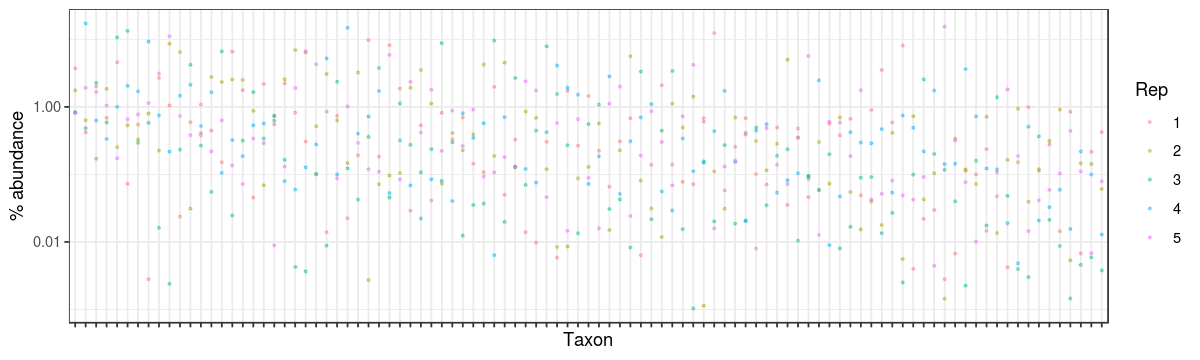

In [6]:
comms$Perc_rel_abund %>% summary %>% print
p = comms %>%
    group_by(Taxon) %>%
    mutate(mean_Rank = mean(Rank)) %>%
    ungroup() %>%
    mutate(Taxon = reorder(Taxon, mean_Rank)) %>%
    ggplot(aes(Taxon, Perc_rel_abund, color=Rep)) +
    geom_point(size=0.5, alpha=0.4) +
    scale_y_log10() +
    labs(y='% abundance') +
    theme_bw() +
    theme(
        axis.text.x = element_blank()
    )

dims(10,3)
plot(p)

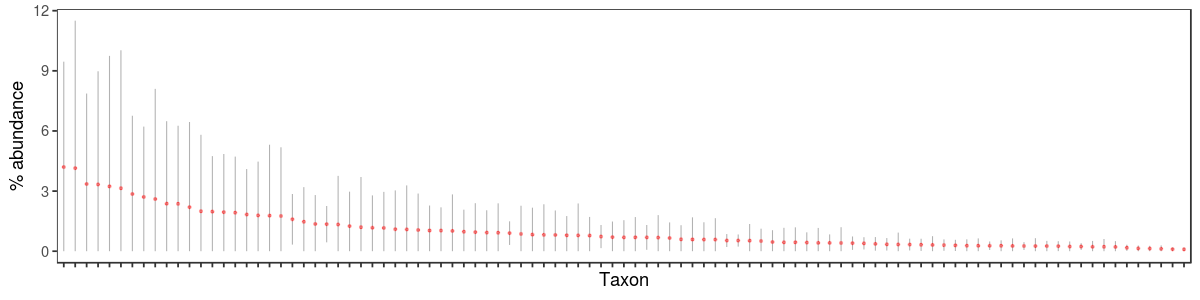

In [7]:
p = comms %>%
    mutate(Perc_rel_abund = ifelse(Perc_rel_abund == 0, 1e-5, Perc_rel_abund)) %>%
    group_by(Taxon) %>%
    summarize(mean_perc_abund = mean(Perc_rel_abund),
              sd_perc_abund = sd(Perc_rel_abund)) %>%
    ungroup() %>%
    mutate(neg_sd_perc_abund = mean_perc_abund - sd_perc_abund,
           pos_sd_perc_abund = mean_perc_abund + sd_perc_abund,
           neg_sd_perc_abund = ifelse(neg_sd_perc_abund <= 0, 1e-5, neg_sd_perc_abund)) %>%
    mutate(Taxon = Taxon %>% reorder(-mean_perc_abund)) %>%
    ggplot(aes(Taxon, mean_perc_abund)) +
    geom_linerange(aes(ymin=neg_sd_perc_abund, ymax=pos_sd_perc_abund),
                   size=0.3, alpha=0.3) +
    geom_point(size=0.5, alpha=0.4, color='red') +
    labs(y='% abundance') +
    theme_bw() +
    theme(
        axis.text.x = element_blank(),
        panel.grid.major.x = element_blank(), 
        panel.grid.major.y = element_blank(), 
        panel.grid.minor.x = element_blank(),
        panel.grid.minor.y = element_blank()
    )

dims(10,2.5)
plot(p)

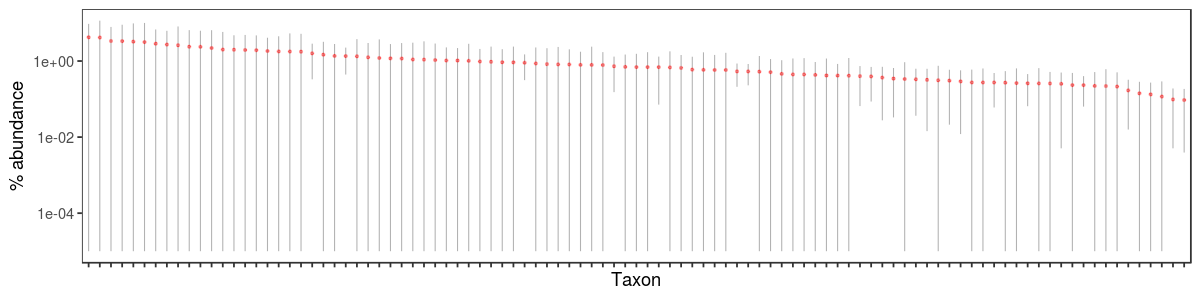

In [8]:
dims(10,2.5)
plot(p + scale_y_log10())

## n100_r25

In [11]:
comm_files = list.files(file.path(n100_r25_dir, 'MGSIM'), 'comm_wAbund.txt', full.names=TRUE, recursive=TRUE)
comm_files %>% length %>% print
comm_files %>% head

[1] 29


[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/MGSIM/1/comm_wAbund.txt" 
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/MGSIM/10/comm_wAbund.txt"
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/MGSIM/11/comm_wAbund.txt"
[4] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/MGSIM/12/comm_wAbund.txt"
[5] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/MGSIM/13/comm_wAbund.txt"
[6] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/MGSIM/14/comm_wAbund.txt"

In [12]:
comms = list()
for(F in comm_files){
    df = read.delim(F, sep='\t')
    df$Rep = basename(dirname(F))
    comms[[F]] = df
}
comms = do.call(rbind, comms)
rownames(comms) = 1:nrow(comms)
comms %>% dfhead

[1] 2871    5


Community,Taxon,Perc_rel_abund,Rank,Rep
1,GB_GCA_001828565_1_Planctomycetes_bacterium_RIFCSPLOWO2_02_FULL_50_16,15.56888,1,1
1,RS_GCF_000410515_1_Enterobacter_sp_R4_368,10.51893,2,1
1,GB_GCA_002393945_1_Bacteroidales_bacterium_UBA4360,10.51231,3,1


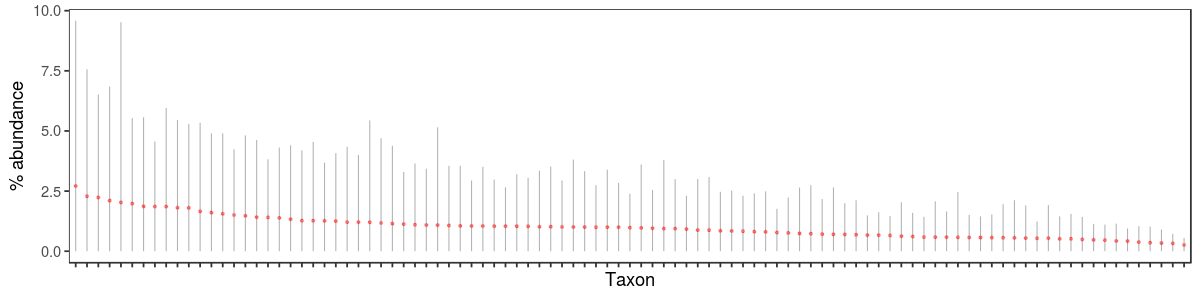

In [13]:
p = comms %>%
    mutate(Perc_rel_abund = ifelse(Perc_rel_abund == 0, 1e-5, Perc_rel_abund)) %>%
    group_by(Taxon) %>%
    summarize(mean_perc_abund = mean(Perc_rel_abund),
              sd_perc_abund = sd(Perc_rel_abund)) %>%
    ungroup() %>%
    mutate(neg_sd_perc_abund = mean_perc_abund - sd_perc_abund,
           pos_sd_perc_abund = mean_perc_abund + sd_perc_abund,
           neg_sd_perc_abund = ifelse(neg_sd_perc_abund <= 0, 1e-5, neg_sd_perc_abund)) %>%
    mutate(Taxon = Taxon %>% reorder(-mean_perc_abund)) %>%
    ggplot(aes(Taxon, mean_perc_abund)) +
    geom_linerange(aes(ymin=neg_sd_perc_abund, ymax=pos_sd_perc_abund),
                   size=0.3, alpha=0.3) +
    geom_point(size=0.5, alpha=0.4, color='red') +
    labs(y='% abundance') +
    theme_bw() +
    theme(
        axis.text.x = element_blank(),
        panel.grid.major.x = element_blank(), 
        panel.grid.major.y = element_blank(), 
        panel.grid.minor.x = element_blank(),
        panel.grid.minor.y = element_blank()
    )

dims(10,2.5)
plot(p)

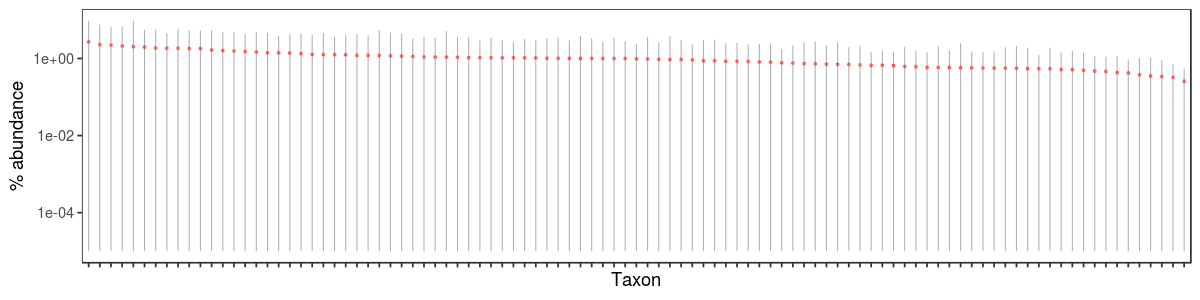

In [14]:
dims(10,2.5)
plot(p + scale_y_log10())

# Estimated coverage

* Coverage estimated with nonpareil

In [29]:
F = file.path(n100_r5_dir, 'coverage', 'nonpareil', 'all_summary.txt')
cov = read.delim(F, sep='\t')
cov %>% summary %>% print

     Sample        C                LR                modelR      
 Min.   :1   Min.   :0.5015   Min.   :149220750   Min.   :0.9995  
 1st Qu.:2   1st Qu.:0.5638   1st Qu.:149295300   1st Qu.:0.9996  
 Median :3   Median :0.5825   Median :149767500   Median :0.9997  
 Mean   :3   Mean   :0.5766   Mean   :149579490   Mean   :0.9996  
 3rd Qu.:4   3rd Qu.:0.6159   3rd Qu.:149806800   3rd Qu.:0.9997  
 Max.   :5   Max.   :0.6195   Max.   :149807100   Max.   :0.9997  
     LRstar            diversity    
 Min.   :1.852e+09   Min.   :18.06  
 1st Qu.:2.036e+09   1st Qu.:18.12  
 Median :2.806e+09   Median :18.17  
 Mean   :2.714e+09   Mean   :18.28  
 3rd Qu.:3.377e+09   3rd Qu.:18.36  
 Max.   :3.501e+09   Max.   :18.69  


In [30]:
F = file.path(n100_r25_dir, 'coverage', 'nonpareil', 'all_summary.txt')
cov = read.delim(F, sep='\t')
cov %>% summary %>% print

     Sample         C                LR                modelR      
 Min.   : 1   Min.   :0.5159   Min.   :149326200   Min.   :0.9990  
 1st Qu.: 7   1st Qu.:0.5682   1st Qu.:149553150   1st Qu.:0.9996  
 Median :13   Median :0.6107   Median :149674650   Median :0.9997  
 Mean   :13   Mean   :0.6176   Mean   :149643336   Mean   :0.9996  
 3rd Qu.:19   3rd Qu.:0.6594   3rd Qu.:149754450   3rd Qu.:0.9997  
 Max.   :25   Max.   :0.7543   Max.   :149897850   Max.   :0.9998  
     LRstar            diversity    
 Min.   :8.746e+08   Min.   :16.94  
 1st Qu.:1.753e+09   1st Qu.:17.89  
 Median :2.223e+09   Median :18.12  
 Mean   :2.243e+09   Mean   :18.05  
 3rd Qu.:2.943e+09   3rd Qu.:18.33  
 Max.   :3.671e+09   Max.   :18.64  


# Feature tables

* feature tables for ML model training/testing

## n100_r5

In [15]:
feat_files = list.files(file.path(n100_r5_dir, 'map'), 'features.tsv.gz', full.names=TRUE, recursive=TRUE)
feat_files %>% length %>% print
feat_files %>% head

[1] 10


[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/map/1/megahit/features.tsv.gz"   
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/map/1/metaspades/features.tsv.gz"
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/map/2/megahit/features.tsv.gz"   
[4] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/map/2/metaspades/features.tsv.gz"
[5] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/map/3/megahit/features.tsv.gz"   
[6] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r5/map/3/metaspades/features.tsv.gz"

In [16]:
feats = list()
for(F in feat_files){
    cmd = glue::glue('gunzip -c {F}', F=F)
    df = fread(cmd, sep='\t') %>%
        distinct(contig, assembler, Extensive_misassembly)
    df$Rep = basename(dirname(dirname(F)))
    feats[[F]] = df
}
feats = do.call(rbind, feats)
rownames(feats) = 1:nrow(feats)
feats %>% dfhead

[1] 114049      4


contig,assembler,Extensive_misassembly,Rep
k141_10001,megahit,,1
k141_10011,megahit,,1
k141_10016,megahit,,1


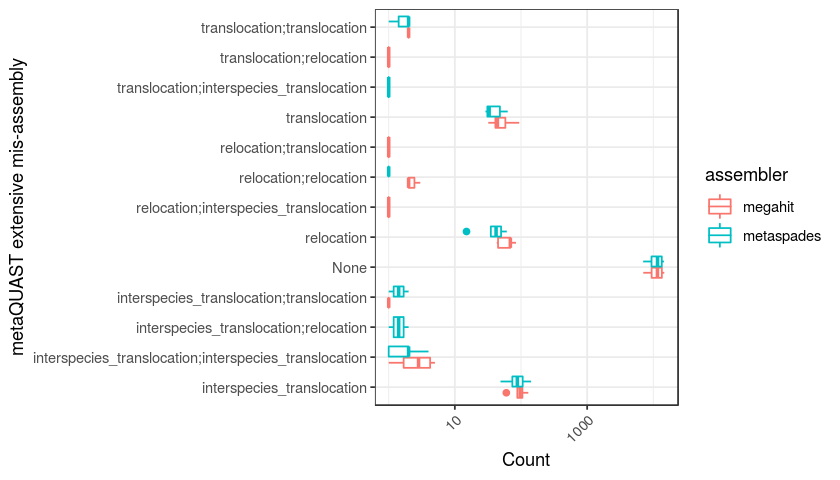

In [17]:
p = feats %>%
    mutate(Extensive_misassembly = ifelse(Extensive_misassembly == '', 'None',
                                          Extensive_misassembly)) %>%
    group_by(Extensive_misassembly, assembler, Rep) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Extensive_misassembly, n, color=assembler)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x='metaQUAST extensive mis-assembly', y='Count') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,4)
plot(p)

## n100_r25

In [18]:
feat_files = list.files(file.path(n100_r25_dir, 'map'), 'features.tsv.gz', full.names=TRUE, recursive=TRUE)
feat_files %>% length %>% print
feat_files %>% head

[1] 56


[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/map/1/megahit/features.tsv.gz"    
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/map/1/metaspades/features.tsv.gz" 
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/map/10/megahit/features.tsv.gz"   
[4] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/map/10/metaspades/features.tsv.gz"
[5] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/map/11/megahit/features.tsv.gz"   
[6] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r25/map/11/metaspades/features.tsv.gz"

In [19]:
feats = list()
for(F in feat_files){
    cmd = glue::glue('gunzip -c {F}', F=F)
    df = fread(cmd, sep='\t') %>%
        distinct(contig, assembler, Extensive_misassembly)
    df$Rep = basename(dirname(dirname(F)))
    feats[[F]] = df
}
feats = do.call(rbind, feats)
rownames(feats) = 1:nrow(feats)
feats %>% dfhead

[1] 538688      4


contig,assembler,Extensive_misassembly,Rep
k141_10019,megahit,,1
k141_10028,megahit,,1
k141_10029,megahit,,1


### Number of contigs

In [21]:
feats_s = feats %>%
    group_by(assembler, Rep) %>%
    summarize(n_contigs = n_distinct(contig)) %>%
    ungroup 

feats_s$n_contigs %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3873    7606    9448    9619   11276   16843 

### Misassembly types

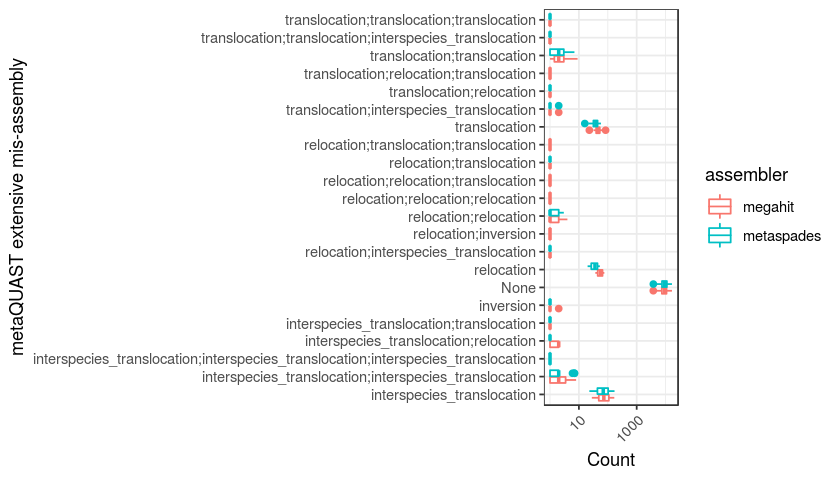

In [20]:
p = feats %>%
    mutate(Extensive_misassembly = ifelse(Extensive_misassembly == '', 'None',
                                          Extensive_misassembly)) %>%
    group_by(Extensive_misassembly, assembler, Rep) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Extensive_misassembly, n, color=assembler)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x='metaQUAST extensive mis-assembly', y='Count') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,4)
plot(p)

# sessionInfo

In [34]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec